## Introduction

分类准确度的问题：对于极度偏斜（Skewed Data）的数据，只使用分类准确度是远远不够的。

使用混淆矩阵（Confusion Matrix）做进一步的分析

![](https://i.imgur.com/5XmT9Bl.png)


精准率和召回率
![](https://i.imgur.com/rQUYkHP.png)
![](https://i.imgur.com/5qjXzXI.png)
![](https://i.imgur.com/iaveJUB.png)
![](https://i.imgur.com/zZBVjHN.png)

## How to accomplish this in python code

In [1]:
# Import package and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data'].copy()
y = digits['target'].copy()

In [2]:
# Converted to a binary classification problem
y[digits['target'] == 9] = 1
y[digits['target'] != 9] = 0

pd.DataFrame(y).value_counts()

0    1617
1     180
Name: count, dtype: int64

In [3]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [4]:
# logistic regression
from sklearn.linear_model import LogisticRegression

log_reg_er = LogisticRegression(max_iter=3000)
log_reg_er.fit(X_train, y_train)
log_reg_er.score(X_test, y_test)
y_predict = log_reg_er.predict(X_test)

In [5]:
# Calculate Confusion Matrix
def calc_tn(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict == 0))


def calc_fn(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict == 0))


def calc_fp(y_true, y_predict):
    return np.sum((y_true == 0) & (y_predict == 1))


def calc_tp(y_true, y_predict):
    return np.sum((y_true == 1) & (y_predict == 1))


def calc_confusion_matrix(y_true: np.array, y_predict: np.array) -> np.array:
    return np.array([
        [calc_tn(y_true, y_predict), calc_fp(y_true, y_predict)],
        [calc_fn(y_true, y_predict), calc_tp(y_true, y_predict)]
    ])


# calc_tn(y_test, y_predict)
# calc_fn(y_test, y_predict)
# calc_tp(y_test, y_predict)
# calc_fp(y_test, y_predict)
calc_confusion_matrix(y_test, y_predict)

array([[404,   1],
       [  6,  39]])

In [6]:
# Calculate the rate of precision and recall
def calc_precision_score(y_true, y_predict):
    tp = calc_tp(y_true, y_predict)
    fp = calc_fp(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except ZeroDivisionError as e:
        print(f'The ERROR is {e}.')
        return 0.0


def calc_recall_score(y_true, y_predict):
    tp = calc_tp(y_true, y_predict)
    fn = calc_fn(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except ZeroDivisionError as e:
        print(f'The ERROR is {e}.')
        return 0.0


# calc_precision_score(y_test, y_predict)
calc_recall_score(y_test, y_predict)

0.8666666666666667

## scikit-learn中的混淆矩阵、精准率和召回率

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[404,   1],
       [  6,  39]], dtype=int64)

In [8]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.975

In [9]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8666666666666667


## F1 Score

F1 Score 是precision和recall的调和平均值。

![](https://i.imgur.com/I7jlxkU.png)

![](https://i.imgur.com/VrpWDF2.png)

![](https://i.imgur.com/4zbrOlQ.png)

In [10]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.9176470588235294

## Precision-Recall的平衡

![](https://i.imgur.com/uH2F7P1.png)

![](https://i.imgur.com/xS4d8tB.png)


In [11]:
# 获得X_test所有样本的score值
log_reg_er.decision_function(X_test)

array([-1.75515071e+01, -2.78874598e+01, -1.75013365e+01, -8.00872233e+01,
       -4.80499991e+01, -2.00572226e+01, -4.08556211e+01, -2.68273123e+01,
       -1.20808121e-01, -2.70595213e+01, -6.60846331e+01, -4.54668406e+01,
       -2.88053773e+01, -4.21355965e+01, -3.86205056e+01, -3.00145671e+01,
       -3.73113177e+01, -7.52144663e+01, -4.01047436e+01, -1.50633874e+01,
       -7.65402852e+00, -7.52543646e+01, -1.44260336e+01, -4.63433357e+01,
       -4.39376754e+00, -5.16443774e+01, -1.06128805e+01, -3.02586938e+01,
       -2.09446226e+01, -1.47898428e+01, -1.57166349e+01, -2.39878975e+01,
       -3.87300924e+01, -2.25902935e+01, -8.75265812e+00, -3.46516419e+00,
       -2.50997879e+01, -2.89270406e+01, -3.11699615e+01, -2.07064636e+01,
       -2.33828822e+01, -6.08709260e+01, -3.97243887e+01, -6.10379721e+01,
       -1.99013923e+01, -9.13875685e+00, -1.73316164e+01, -1.99796794e+01,
       -2.92044236e+01, -3.00494115e+01,  4.07684919e+00,  1.14987064e+01,
       -3.02656792e+01, -

In [12]:
# 前10个样本的score值都为负，因此其对应的predict应该都为0.
log_reg_er.decision_function(X_test)[:10]

array([-17.55150712, -27.88745979, -17.50133645, -80.08722328,
       -48.04999907, -20.05722263, -40.85562114, -26.82731226,
        -0.12080812, -27.05952132])

In [13]:
log_reg_er.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# 将score值的阈值设置为5，默认为0.
y_predict_02 = (log_reg_er.decision_function(X_test) > 5).astype('int')
y_predict_02

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
confusion_matrix(y_test, y_predict_02)

array([[405,   0],
       [ 18,  27]], dtype=int64)

In [16]:
# 精准率得到了大大提高
precision_score(y_test, y_predict_02)

1.0

In [17]:
# 召回率大大下降
recall_score(y_test, y_predict_02)

0.6

In [18]:
f1_score(y_test, y_predict_02)

0.7499999999999999

In [19]:
# 将score值的阈值设置为5，默认为0.
y_predict_03 = (log_reg_er.decision_function(X_test) > -5).astype('int')
y_predict_03

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
confusion_matrix(y_test, y_predict_03)

array([[393,  12],
       [  5,  40]], dtype=int64)

In [21]:
precision_score(y_test, y_predict_03)

0.7692307692307693

In [22]:
recall_score(y_test, y_predict_03)

0.8888888888888888

In [23]:
f1_score(y_test, y_predict_03)

0.8247422680412372

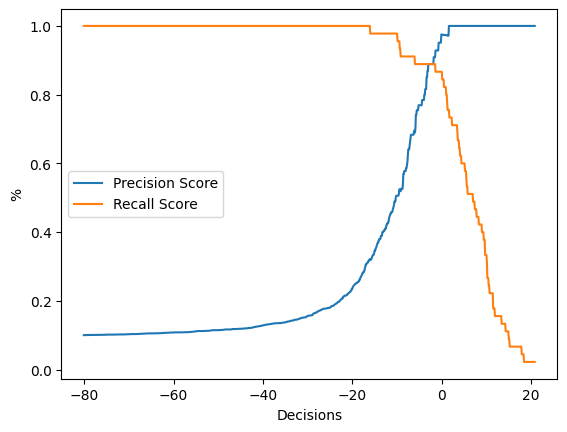

In [24]:
precisions, recalls, decisions = [], [], log_reg_er.decision_function(X_test)
thresholds = np.arange(np.min(decisions), np.max(decisions), 0.1)

for threshold in thresholds:
    y_predict = (log_reg_er.decision_function(X_test) > threshold).astype('int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

plt.plot(thresholds, precisions, label='Precision Score')
plt.plot(thresholds, recalls, label='Recall Score')
plt.xlabel('Decisions')
plt.ylabel('%')
plt.legend()
plt.show()

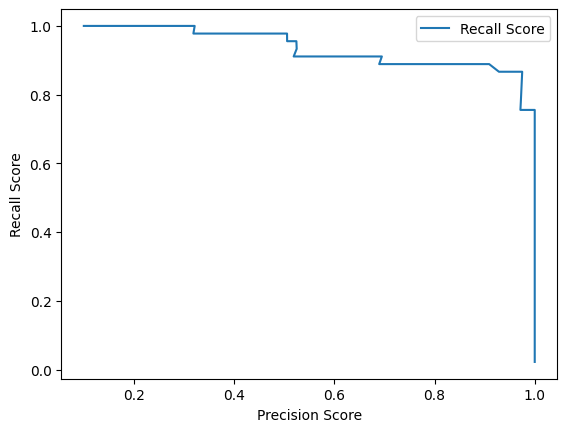

In [25]:
# Precision-Recall曲线
plt.plot(precisions, recalls, label='Recall Score')
plt.xlabel('Precision Score')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

In [26]:
# scikit-learn中的Precision-Recall曲线
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decisions)

In [27]:
# The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold.
precisions.shape, recalls.shape, thresholds.shape

((451,), (451,), (450,))

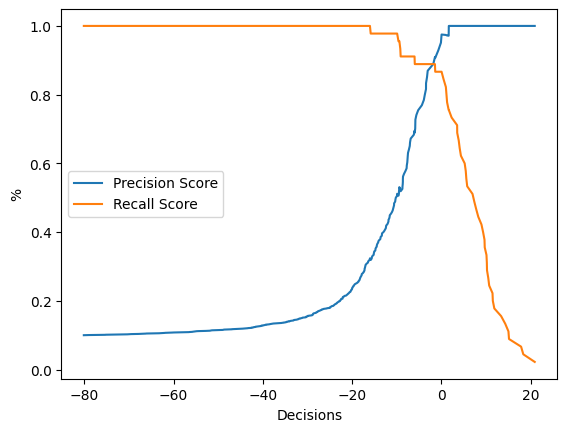

In [28]:
plt.plot(thresholds, precisions[:-1], label='Precision Score')
plt.plot(thresholds, recalls[:-1], label='Recall Score')
plt.xlabel('Decisions')
plt.ylabel('%')
plt.legend()
plt.show()

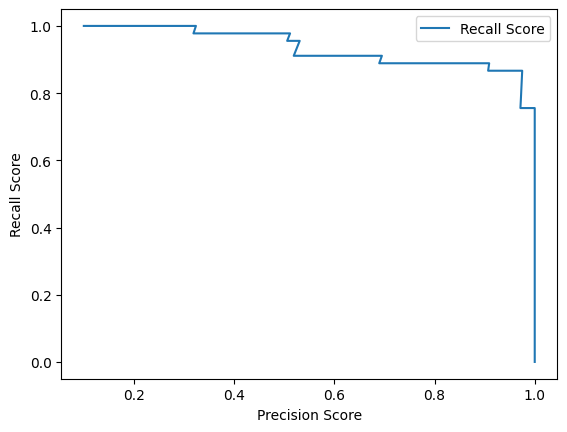

In [29]:
# Precision-Recall曲线
plt.plot(precisions, recalls, label='Recall Score')
plt.xlabel('Precision Score')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

## ROC曲线

Receiver Operation Characteristic Curve

描述TPR和FPR之间的关系

![](https://i.imgur.com/IrJ5FVM.png)

![](https://i.imgur.com/U4sfViF.png)

In [30]:
def calc_tpr(y_true, y_predict):
    tp = calc_tp(y_true, y_predict)
    fn = calc_fn(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except ZeroDivisionError as e:
        print(f'The ERROR is {e}.')
        return 0.0


def calc_fpr(y_true, y_predict):
    fp = calc_fp(y_true, y_predict)
    tn = calc_tn(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except ZeroDivisionError as e:
        print(f'The ERROR is {e}.')
        return 0.0

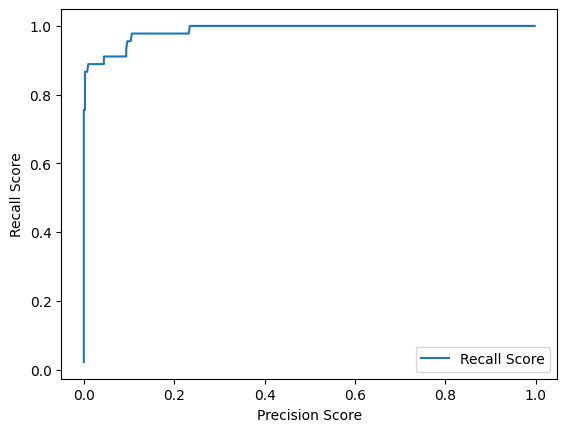

In [31]:
tprs, fprs = [], []
thresholds = np.arange(np.min(decisions), np.max(decisions), 0.1)

for threshold in thresholds:
    y_predict = (log_reg_er.decision_function(X_test) > threshold).astype('int')
    tprs.append(calc_tpr(y_test, y_predict))
    fprs.append(calc_fpr(y_test, y_predict))

plt.show()
# Precision-Recall曲线
plt.plot(fprs, tprs, label='Recall Score')
plt.xlabel('Precision Score')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

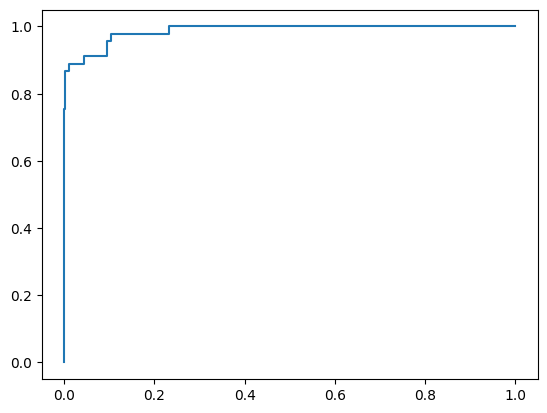

In [32]:
# scikit-learn中的ROC
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decisions)

plt.plot(fprs, tprs)
plt.show()

In [33]:
# Calculate the area of under the ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decisions)

0.9868861454046639

## 多分类问题中的混淆矩阵

In [34]:
X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [35]:
log_reg_er = LogisticRegression(max_iter=3000)
log_reg_er.fit(X_train, y_train)
log_reg_er.score(X_test, y_test)

0.9688888888888889

In [36]:
y_predict = log_reg_er.predict(X_test)
y_predict

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 5, 9, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 2, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 5, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 7, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 8, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 8, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 5, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [37]:
precision_score(y_test, y_predict, average='micro')

0.9688888888888889

In [38]:
recall_score(y_test, y_predict, average='micro')

0.9688888888888889

In [39]:
cfm = confusion_matrix(y_test, y_predict)
cfm

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  1, 44,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 41]], dtype=int64)

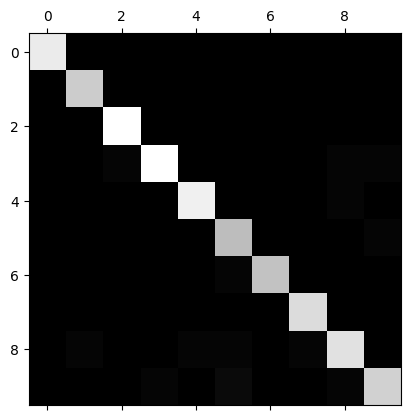

In [40]:
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [41]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.02222222],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02222222],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

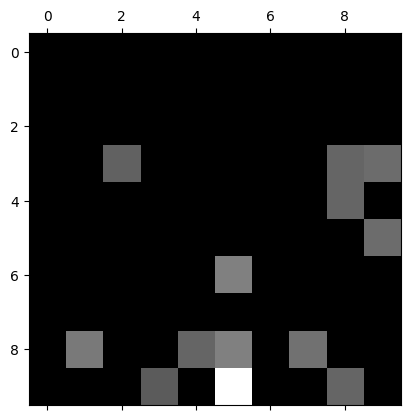

In [42]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()